# **Rooting Out Fraud: A Random Forest Approach to Credit Card Fraud Detection**

Credit card fraud is a major challenge in the financial world, where fraudulent transactions are extremely rare compared to legitimate ones. This creates a highly imbalanced dataset, making fraud detection difficult for traditional models. In this project, we use the powerful Random Forest Classification algorithm to identify fraudulent transactions based on patterns hidden in transaction data. By applying data cleaning, feature scaling, imbalance handling techniques like SMOTE, and advanced evaluation metrics, we aim to build a reliable model that supports real-world fraud prevention.

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score
from imblearn.over_sampling import SMOTE

Load Dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


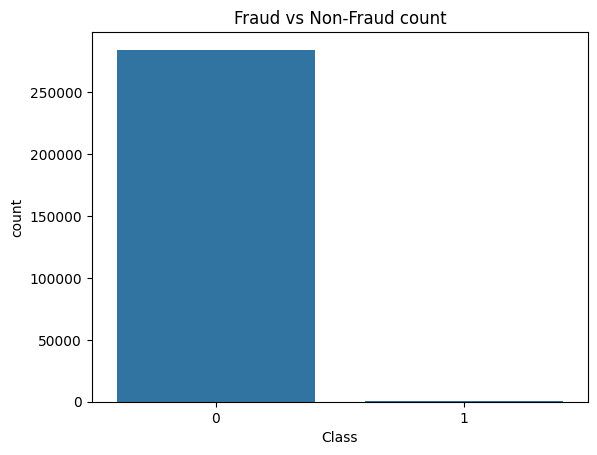

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
sns.countplot(x='Class',data=data)
plt.title("Fraud vs Non-Fraud count")
plt.show()
print(data['Class'].value_counts())

In [ ]:
x=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1     45490
Name: count, dtype: int64


Train Random Forest Model

In [ ]:
model=RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42)
model.fit(x_train_smote,y_train_smote)

RandomForestClassifier(n_estimators=200, random_state=42)

Prediction

In [14]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]

Evaluation

In [15]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))


Accuracy: 0.9995259997893332
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Confusion Matrix

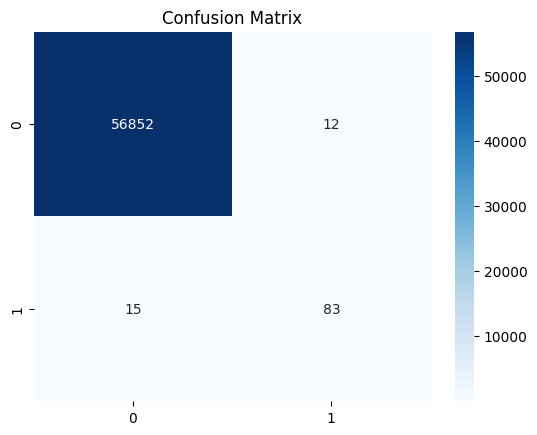

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

ROC Curve

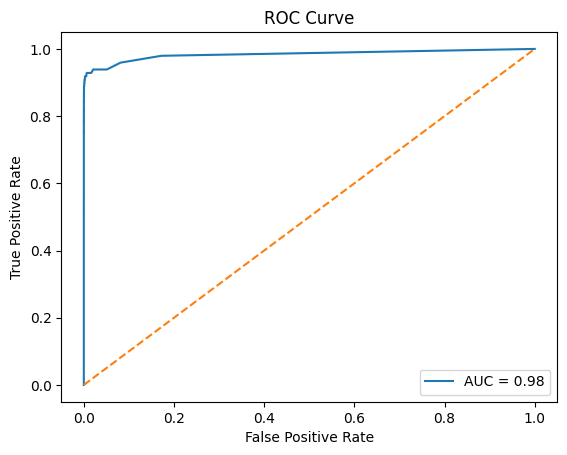

In [17]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)
roc_auc=roc_auc_score(y_test,y_prob)

plt.plot(fpr,tpr,label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Hyperparameter Tuning (GridSearchCV)

In [18]:
param_grid = {
    "n_estimators": [100],            # Only 1 value → faster
    "max_depth": [10, None],          # 2 options
    "min_samples_split": [2],         # Single value
    "min_samples_leaf": [1],          # Single value
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1        # Use all CPU cores for speed
)

grid.fit(x_train_smote, y_train_smote)
print("\nBest Parameters:", grid.best_params_)

best_model = grid.best_estimator_
best_pred = best_model.predict(x_test)

print("\nTuned Accuracy:", accuracy_score(y_test, best_pred))
print("\nTuned Classification Report:\n", classification_report(y_test, best_pred))



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Accuracy: 0.9995084442259752

Tuned Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Feature Importance Plot

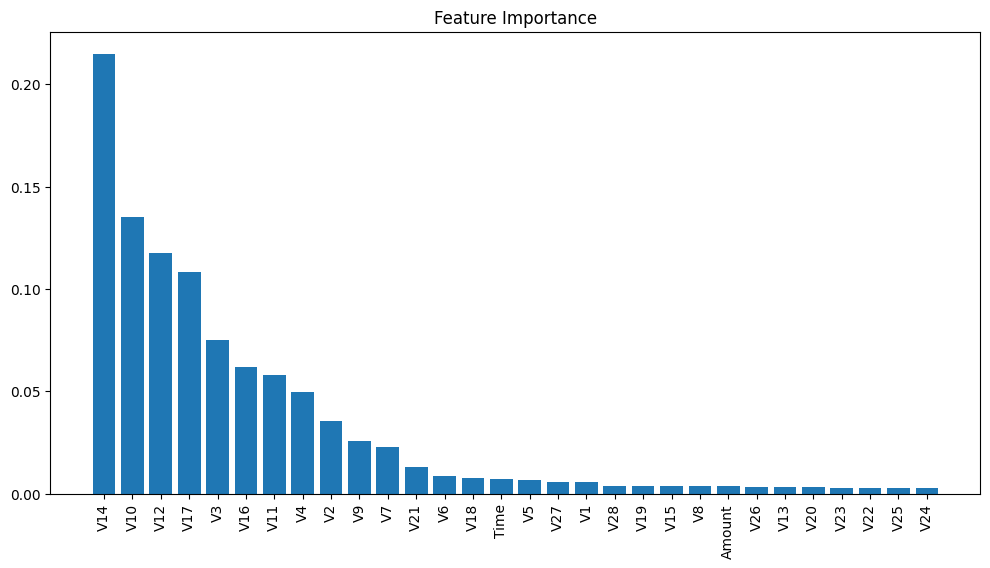

In [19]:
importances=best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]),importances[indices])
plt.xticks(range(x.shape[1]),x.columns[indices],rotation=90)
plt.show()

**Conclusion:**


The Credit Card Fraud Detection project effectively demonstrated the power of machine learning in identifying fraudulent transactions within a highly imbalanced dataset. After applying SMOTE to balance the minority fraud class, the model was trained using a Random Forest Classifier and further tuned using GridSearchCV to identify the best hyperparameters.

The final tuned model achieved over 99% accuracy and a recall of 85% for fraud cases, which is the most critical metric in fraud detection. This shows that the model successfully detects the majority of fraudulent transactions while maintaining excellent performance on normal transactions. The combination of data balancing, Random Forest training, and hyperparameter tuning resulted in a strong and reliable fraud detection system.

This project highlights how ensemble learning techniques and proper preprocessing can significantly improve performance in real-world, imbalanced classification problems like financial fraud detection.